In [2]:
import tensorflow
import numpy as np
from keras import layers
from keras.layers import Input, Dense, Activation,BatchNormalization, Flatten, Conv2D, MaxPooling2D,Dropout
from keras.models import Model,Sequential
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
import keras.backend as K
K.set_image_data_format('channels_last')
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
from sklearn.metrics import classification_report, confusion_matrix,ConfusionMatrixDisplay
import tensorflow as tf
import pydot
import os

In [3]:
train_dir='train_frames'
test_dir='test_frames'

In [4]:
os.listdir(test_dir)

['Bye',
 'Work ',
 'House',
 'No',
 'Nice',
 'Good',
 'Yes ',
 'Hello',
 'Thank You',
 'Morning',
 'Welcome ']

In [5]:
labels=['Bye','Work ','House','No','Nice','Good','Yes ','Hello','Thank You','Morning','Welcome ']

In [6]:
BATCH_SIZE = 32
IMG_SIZE = (150,150)
num_of_test_samples=7589

In [8]:
train_dataset = tf.keras.utils.image_dataset_from_directory(train_dir,
                                                            shuffle=True,
                                                            batch_size=BATCH_SIZE,
                                                            image_size=IMG_SIZE)

test_dataset = tf.keras.utils.image_dataset_from_directory(test_dir,
                                                            shuffle=True,
                                                            batch_size=BATCH_SIZE,
                                                            image_size=IMG_SIZE)

Found 7850 files belonging to 11 classes.
Found 7589 files belonging to 11 classes.


In [9]:
test_datagen = ImageDataGenerator(rescale=1. / 255)
test_generator = test_datagen.flow_from_directory(test_dir,IMG_SIZE,
                                                        batch_size=BATCH_SIZE,
                                                        class_mode='categorical')

Found 7589 images belonging to 11 classes.


In [10]:
AUTOTUNE = tf.data.AUTOTUNE

train_dataset = train_dataset.prefetch(buffer_size=AUTOTUNE)
test_dataset = test_dataset.prefetch(buffer_size=AUTOTUNE)

In [11]:
data_augmentation = tf.keras.Sequential([
  tf.keras.layers.RandomFlip('horizontal'),
  tf.keras.layers.RandomRotation(0.2),
])

In [12]:
path = 'train_frames'
train_datagen = ImageDataGenerator(rescale=1. / 255)
train = train_datagen.flow_from_directory(path, target_size=(150,150), class_mode='categorical')

Found 7850 images belonging to 11 classes.


In [13]:
print("Batch Size for Input Image : ",train[0][0].shape)
print("Batch Size for Output Image : ",train[0][1].shape)
print("Image Size of first image : ",train[0][0][0].shape)
print("Output of first image : ",train[0][1][0].shape)

Batch Size for Input Image :  (32, 150, 150, 3)
Batch Size for Output Image :  (32, 11)
Image Size of first image :  (150, 150, 3)
Output of first image :  (11,)


/home/hena/.local/lib/python3.10/site-packages/matplotlib/text.py:1241: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


Text(0.5, 1.0, '[0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]')

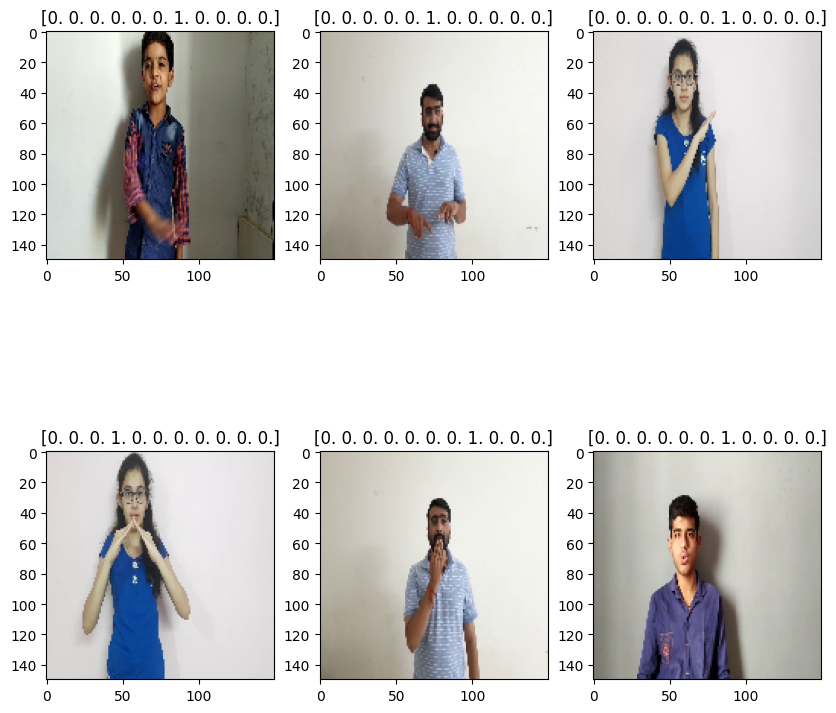

In [50]:
fig , axs = plt.subplots(2,3 ,figsize = (10,10))
axs[0][0].imshow(train[0][0][12])
axs[0][0].set_title(train[0][1][12])
axs[0][1].imshow(train[0][0][10])
axs[0][1].set_title(train[0][1][10])
axs[0][2].imshow(train[0][0][5])
axs[0][2].set_title(train[0][1][5])
axs[1][0].imshow(train[0][0][20])
axs[1][0].set_title(train[0][1][20])
axs[1][1].imshow(train[0][0][25])
axs[1][1].set_title(train[0][1][25])
axs[1][2].imshow(train[0][0][3])
axs[1][2].set_title(train[0][1][3])

In [14]:
def create_model():
    shape_img = (150,150,3)
    
    model = Sequential()

    model.add(Conv2D(filters=32, kernel_size=(3,3),input_shape=shape_img, activation='relu', padding = 'same'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(filters=64, kernel_size=(3,3),input_shape=shape_img, activation='relu', padding = 'same'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(filters=64, kernel_size=(3,3),input_shape=shape_img, activation='relu', padding = 'same'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(filters=64, kernel_size=(3,3),input_shape=shape_img, activation='relu', padding = 'same'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(filters=64, kernel_size=(3,3),input_shape=shape_img, activation='relu', padding = 'same'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(filters=64, kernel_size=(3,3),input_shape=shape_img, activation='relu', padding = 'same'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Flatten())

    model.add(Dense(256))
    model.add(Activation('relu'))
    model.add(Dropout(0.5))

    model.add(Dense(11))
    model.add(Activation('softmax'))

    model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
    
    return model

In [15]:
model = create_model()

In [16]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 75, 75, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 37, 37, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 37, 37, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 18, 18, 64)      

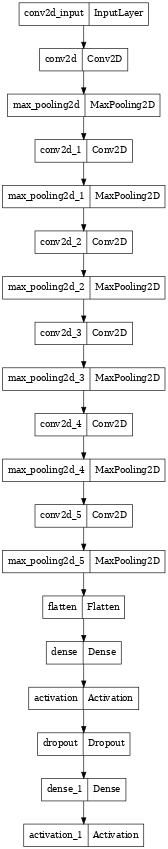

In [17]:
tf.keras.utils.plot_model(
    model, to_file='cnn.png', show_shapes=False, show_layer_names=True,
    rankdir='TB', expand_nested=True, dpi=45
)

In [18]:
model.compile(optimizer='Adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [19]:
history = model.fit(train_dataset,
                    epochs=15,
                    validation_data=test_dataset)

Epoch 1/15


/home/hena/.local/lib/python3.10/site-packages/keras/backend.py:5585: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


246/246 [==============================] - 312s 1s/step - loss: 2.6743 - accuracy: 0.1046 - val_loss: 2.3929 - val_accuracy: 0.0920
Epoch 2/15
246/246 [==============================] - 310s 1s/step - loss: 2.3044 - accuracy: 0.1680 - val_loss: 1.8617 - val_accuracy: 0.3625
Epoch 3/15
246/246 [==============================] - 339s 1s/step - loss: 1.3327 - accuracy: 0.5422 - val_loss: 0.5033 - val_accuracy: 0.8468
Epoch 4/15
246/246 [==============================] - 333s 1s/step - loss: 0.4784 - accuracy: 0.8439 - val_loss: 0.1320 - val_accuracy: 0.9613
Epoch 5/15
246/246 [==============================] - 330s 1s/step - loss: 0.2424 - accuracy: 0.9222 - val_loss: 0.0556 - val_accuracy: 0.9855
Epoch 6/15
246/246 [==============================] - 327s 1s/step - loss: 0.1239 - accuracy: 0.9603 - val_loss: 0.0523 - val_accuracy: 0.9817
Epoch 7/15
246/246 [==============================] - 336s 1s/step - loss: 0.1165 - accuracy: 0.9662 - val_loss: 0.0339 - val_accuracy: 0.9880
Epoch 8/15

In [22]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

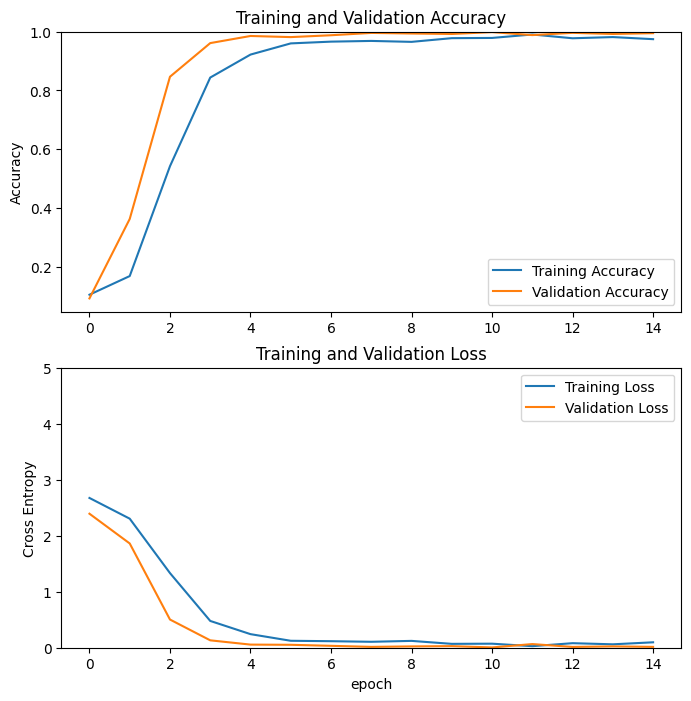

In [23]:
plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,5.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [24]:
Y_pred = model.predict(test_dataset)

238/238 [==============================] - 80s 286ms/step


In [25]:
y_pred = np.argmax(Y_pred, axis=1)

In [28]:
cm = confusion_matrix(test_generator.classes, y_pred)

In [29]:
print(cm)

[[60 54 70 70 59 71 50 56 64 70 67]
 [54 45 62 60 49 80 47 71 76 54 55]
 [70 49 62 57 72 54 56 69 67 69 69]
 [62 65 60 66 46 68 45 63 67 61 80]
 [64 70 63 48 64 70 32 65 69 55 71]
 [76 68 68 72 75 75 57 70 65 70 59]
 [52 51 52 52 60 49 42 41 45 68 60]
 [61 47 66 68 65 72 60 72 54 74 74]
 [57 80 58 56 61 67 52 76 63 62 58]
 [65 73 65 75 62 70 59 68 66 78 59]
 [67 48 72 61 54 78 59 65 71 79 73]]


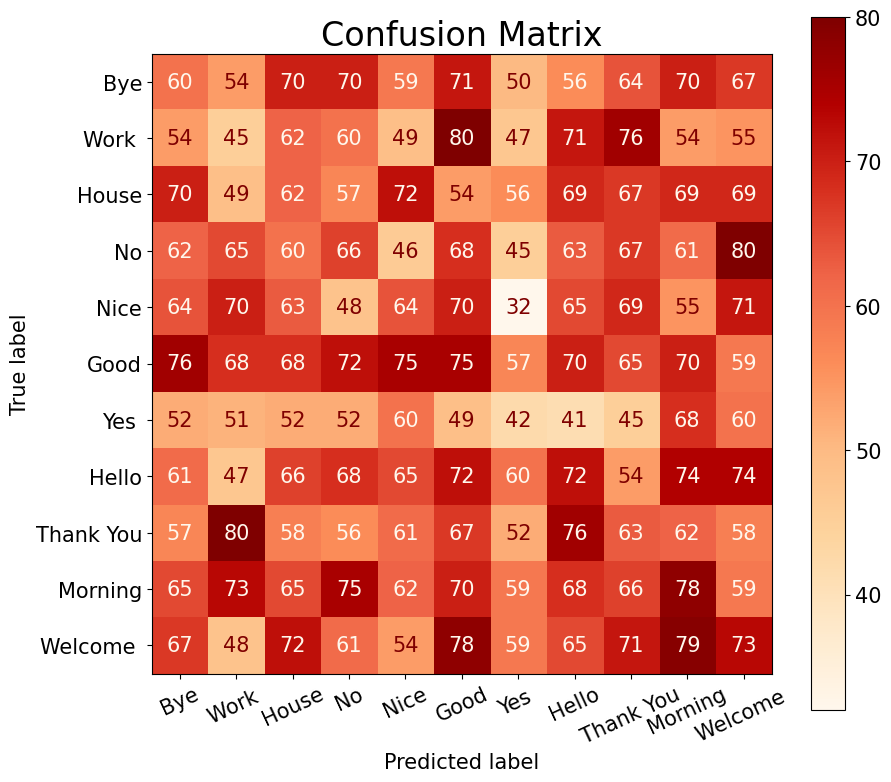

In [30]:
plt.rcParams['figure.figsize'] = (10.0, 9.0)
plt.rcParams['font.size'] = 15
display_c_m = ConfusionMatrixDisplay(cm, display_labels=labels)
display_c_m.plot(cmap='OrRd', xticks_rotation=25)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title('Confusion Matrix', fontsize=24)
plt.savefig('confusion_matrix_cnn.png', transparent=True, dpi=400)
plt.show()